<a href="https://colab.research.google.com/github/pramanand-coder/code-portfolio/blob/master/_Clustering_using_Income_spent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
u=files.upload()

Saving dataset.csv to dataset (1).csv


In [3]:
dataset=pd.read_csv("dataset.csv")

**Summarizing the dataset**

In [4]:
print(dataset.shape)
print(dataset.head())

(303, 2)
   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163


In [5]:
print(dataset.describe())

           INCOME       SPEND
count  303.000000  303.000000
mean   245.273927  149.646865
std     48.499412   22.905161
min    126.000000   71.000000
25%    211.000000  133.500000
50%    240.000000  153.000000
75%    274.000000  166.000000
max    417.000000  202.000000


**Segregating and Zipping the dataset**

In [6]:
income=dataset["INCOME"].values
spend=dataset["SPEND"].values
x=np.array(list(zip(income,spend)))

In [7]:
print(x)

[[233 150]
 [250 187]
 [204 172]
 [236 178]
 [354 163]
 [192 148]
 [294 153]
 [263 173]
 [199 162]
 [168 174]
 [239 160]
 [275 139]
 [266 171]
 [211 144]
 [283 162]
 [219 158]
 [340 172]
 [226 114]
 [247 171]
 [239 151]
 [234 161]
 [233 179]
 [226 178]
 [243 137]
 [199 178]
 [302 162]
 [212 157]
 [175 123]
 [417 157]
 [197 152]
 [198 168]
 [177 140]
 [219 188]
 [273 152]
 [213 125]
 [177 160]
 [304 170]
 [232 165]
 [269 148]
 [360 151]
 [308 142]
 [245 180]
 [208 148]
 [264 143]
 [321 182]
 [325 172]
 [235 180]
 [257 156]
 [216 115]
 [234 160]
 [256 149]
 [302 151]
 [231 146]
 [141 175]
 [252 172]
 [201 158]
 [222 186]
 [260 185]
 [182 174]
 [303 159]
 [265 130]
 [309 156]
 [186 190]
 [203 132]
 [211 165]
 [183 182]
 [222 143]
 [234 175]
 [220 170]
 [209 163]
 [258 147]
 [227 154]
 [204 202]
 [261 186]
 [213 165]
 [250 161]
 [245 166]
 [221 164]
 [205 184]
 [240 154]
 [250 179]
 [308 170]
 [318 160]
 [298 178]
 [265 122]
 [264 160]
 [277 151]
 [197 156]
 [214 158]
 [248 122]
 [255 175]

**Finding the best K value**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

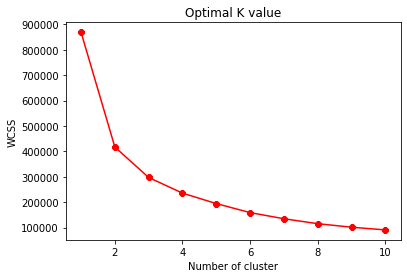

In [8]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red",marker="8")
plt.title("Optimal K value")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")

Fitting the kmeans to the dataset with k=6

In [9]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=6,random_state=0)
y_means=model.fit_predict(x)
print(y_means)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 4 3 4 5 3 2 4 3 3 4 0 4 1 2 4 5 1 4 4 4 4 4 4 3 2 3 1 5 3 3 1 3 2 1 3 2
 4 4 5 2 4 3 0 2 2 4 4 1 4 4 2 4 3 4 3 4 4 3 2 0 2 3 1 3 3 4 4 4 3 4 4 3 4
 3 4 4 4 3 4 4 2 2 2 0 4 2 3 3 0 4 3 4 2 1 1 5 4 2 4 4 0 3 4 3 1 4 4 4 4 2
 3 2 3 4 3 3 3 3 4 2 4 4 4 3 3 1 2 3 0 3 4 2 4 2 4 1 1 1 0 2 2 3 4 1 4 4 4
 4 3 4 1 4 2 4 1 4 3 4 4 4 5 3 3 3 0 4 4 4 3 4 4 2 4 1 1 4 5 1 0 5 1 2 4 0
 2 4 0 4 3 2 1 1 2 3 2 4 4 0 4 3 0 0 2 1 4 4 4 1 3 4 0 1 2 4 5 0 2 0 4 5 1
 2 2 0 1 0 1 2 2 4 0 2 0 2 2 2 2 2 2 0 4 1 0 1 2 5 0 2 4 2 4 0 2 0 2 0 1 4
 4 4 4 0 4 1 1 2 1 0 0 4 4 0 4 0 3 1 0 2 1 2 3 1 4 1 2 3 4 5 1 3 2 4 3 1 1
 1 1 0 0 1 1 4]


**Visualizing the dataset for k=6**

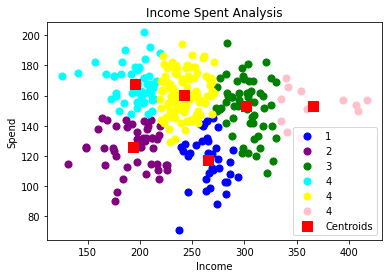

In [10]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c="blue",label=1)
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c="purple",label=2)
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=50,c="green",label=3)
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=50,c="cyan",label=4)
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=50,c="yellow",label=4)
plt.scatter(x[y_means==5,0],x[y_means==5,1],s=50,c="pink",label=4)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="s",label="Centroids",s=100,c="red")
plt.title("Income Spent Analysis")
plt.xlabel("Income")
plt.ylabel("Spend")
plt.legend()
plt.show()